In [1]:
!pip install hstrader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 1.1 MB/s eta 0:00:00


In [94]:
from hstrader import HsTrader
from hstrader.models import Event, Tick, Order, CrtOrder, OrderType, SideType, Status, Position, Resolution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import os

In [95]:
CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET = os.getenv('CLIENT_SECRET')


client = HsTrader(CLIENT_ID, CLIENT_SECRET)

In [82]:
# HsTrader symbol
symbol = client.get_symbol("EURUSD")
# HsTrader market data
data = client.get_market_history(symbol, resolution=Resolution.W1,count_back = 1000)

In [83]:

df = pd.DataFrame([historytick.dict() for historytick in data])
print(df)

                        time     open     high      low    close        volume
0  2024-03-07 00:00:00+00:00  1.08273  1.09057  1.08273  1.08895  1.615638e+07
1  2024-03-14 00:00:00+00:00  1.08895  1.09710  1.08578  1.09428  2.863955e+07
2  2024-03-21 00:00:00+00:00  1.09436  1.09453  1.08247  1.09274  3.028678e+07
3  2024-03-28 00:00:00+00:00  1.09278  1.09331  1.07916  1.08029  3.062761e+07
4  2024-04-04 00:00:00+00:00  1.08034  1.08312  1.07146  1.08285  2.995594e+07
5  2024-04-11 00:00:00+00:00  1.08283  1.08755  1.07186  1.07317  3.078634e+07
6  2024-04-18 00:00:00+00:00  1.07314  1.07470  1.05913  1.06590  3.056850e+07
7  2024-04-25 00:00:00+00:00  1.06593  1.07045  1.06006  1.06904  3.008302e+07
8  2024-05-02 00:00:00+00:00  1.06905  1.07432  1.06393  1.07072  2.990122e+07
9  2024-05-09 00:00:00+00:00  1.07074  1.08013  1.06644  1.07372  2.946027e+07
10 2024-05-16 00:00:00+00:00  1.07373  1.08008  1.07142  1.07959  2.050827e+07
11 2024-05-23 00:00:00+00:00  1.08805  1.49905  0.99

In [84]:
df['time'] = pd.to_datetime(df['time']).dt.date
df.head()

,time,open,high,low,close,volume
0,2024-03-07,1.08273,1.09057,1.08273,1.08895,1.615638e+07
1,2024-03-14,1.08895,1.09710,1.08578,1.09428,2.863955e+07
2,2024-03-21,1.09436,1.09453,1.08247,1.09274,3.028678e+07
3,2024-03-28,1.09278,1.09331,1.07916,1.08029,3.062761e+07
4,2024-04-04,1.08034,1.08312,1.07146,1.08285,2.995594e+07


In [85]:
def calculate_pivots(df):
    df['P'] = (df['high'] + df['low'] + df['close']) / 3
    df['R1'] = (2 * df['P']) - df['low']
    df['S1'] = (2 * df['P']) - df['high']
    df['R2'] = df['P'] + (df['high'] - df['low'])
    df['S2'] = df['P'] - (df['high'] - df['low'])
    df['R3'] = df['high'] + 2 * (df['P'] - df['low'])
    df['S3'] = df['low'] - 2 * (df['high'] - df['P'])
    return df

In [86]:
calculate_pivots(df)




,time,open,high,low,close,volume,P,R1,S1,R2,S2,R3,S3
0,2024-03-07,1.08273,1.09057,1.08273,1.08895,1.615638e+07,1.087417,1.092103,1.084263,1.095257,1.079577,1.099943,1.076423
1,2024-03-14,1.08895,1.09710,1.08578,1.09428,2.863955e+07,1.092387,1.098993,1.087673,1.103707,1.081067,1.110313,1.076353
2,2024-03-21,1.09436,1.09453,1.08247,1.09274,3.028678e+07,1.089913,1.097357,1.085297,1.101973,1.077853,1.109417,1.073237
3,2024-03-28,1.09278,1.09331,1.07916,1.08029,3.062761e+07,1.084253,1.089347,1.075197,1.098403,1.070103,1.103497,1.061047
4,2024-04-04,1.08034,1.08312,1.07146,1.08285,2.995594e+07,1.079143,1.086827,1.075167,1.090803,1.067483,1.098487,1.063507
5,2024-04-11,1.08283,1.08755,1.07186,1.07317,3.078634e+07,1.077527,1.083193,1.067503,1.093217,1.061837,1.098883,1.051813
6,2024-04-18,1.07314,1.07470,1.05913,1.06590,3.056850e+07,1.066577,1.074023,1.058453,1.082147,1.051007,1.089593,1.042883
7,2024-04-25,1.06593,1.07045,1.06006,1.06904,3.008302e+07,1.066517,1.072973,1.062583,1.076907,1.056127,1.083363,1.052193
8,2024-05-02,1.06905,1.07432,1.06393,1.07072,2.990122e+07,1.069657,1.075383,1.064993,1.080047,1.059267,1.085773,1.054603
9,2024-05-09,1.07074,1.08013,1.06644,1.07372,2.946027e+07,1.073430,1.080420,1.066730,1.087120,1.059740,1.094110,1.053040


In [87]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df.head()

,open,high,low,close,volume,P,R1,S1,R2,S2,R3,S3
time,,,,,,,,,,,,
2024-03-07,1.08273,1.09057,1.08273,1.08895,1.615638e+07,1.087417,1.092103,1.084263,1.095257,1.079577,1.099943,1.076423
2024-03-14,1.08895,1.09710,1.08578,1.09428,2.863955e+07,1.092387,1.098993,1.087673,1.103707,1.081067,1.110313,1.076353
2024-03-21,1.09436,1.09453,1.08247,1.09274,3.028678e+07,1.089913,1.097357,1.085297,1.101973,1.077853,1.109417,1.073237
2024-03-28,1.09278,1.09331,1.07916,1.08029,3.062761e+07,1.084253,1.089347,1.075197,1.098403,1.070103,1.103497,1.061047
2024-04-04,1.08034,1.08312,1.07146,1.08285,2.995594e+07,1.079143,1.086827,1.075167,1.090803,1.067483,1.098487,1.063507


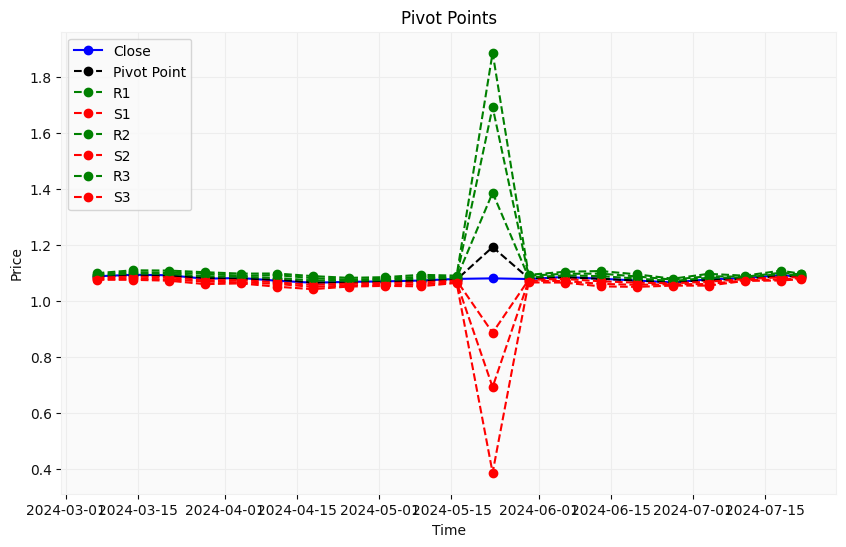

In [88]:




fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df['close'], label='Close', marker='o', linestyle='-', color='blue')
ax.plot(df.index, df['P'], label='Pivot Point', marker='o', linestyle='--', color='black')
ax.plot(df.index, df['R1'], label='R1', marker='o', linestyle='--', color='green')
ax.plot(df.index, df['S1'], label='S1', marker='o', linestyle='--', color='red')
ax.plot(df.index, df['R2'], label='R2', marker='o', linestyle='--', color='green')
ax.plot(df.index, df['S2'], label='S2', marker='o', linestyle='--', color='red')
ax.plot(df.index, df['R3'], label='R3', marker='o', linestyle='--', color='green')
ax.plot(df.index, df['S3'], label='S3', marker='o', linestyle='--', color='red')

ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Pivot Points')
ax.legend(loc='upper left')

plt.grid(True)
plt.show()

In [91]:
import mplfinance as mpf
import plotly.graph_objects as go


fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df["open"],
    high=df["high"],
    low=df["low"],
    close=df["close"],
    name="EURUSD")])

# Update layout to hide the rangeslider
fig.update_layout(xaxis_rangeslider_visible=False)

# Function to add horizontal lines for pivot points
def add_pivot_lines(fig, df, column, color, name):
    fig.add_trace(go.Scatter(
        x=[df.index[0], df.index[-1]], # Horizontal line across entire x-axis
        y=[df[column].iloc[0], df[column].iloc[0]],
        mode="lines",
        line=dict(color=color, width=2),
        name=name
    ))

# Add pivot points as horizontal lines
add_pivot_lines(fig, df, 'P', 'orange', 'PP')
add_pivot_lines(fig, df, 'S1', 'red', 'S1')
add_pivot_lines(fig, df, 'S2', 'red', 'S2')
add_pivot_lines(fig, df, 'R1', 'green', 'R1')
add_pivot_lines(fig, df, 'R2', 'green', 'R2')

# Show the figure
fig.show()

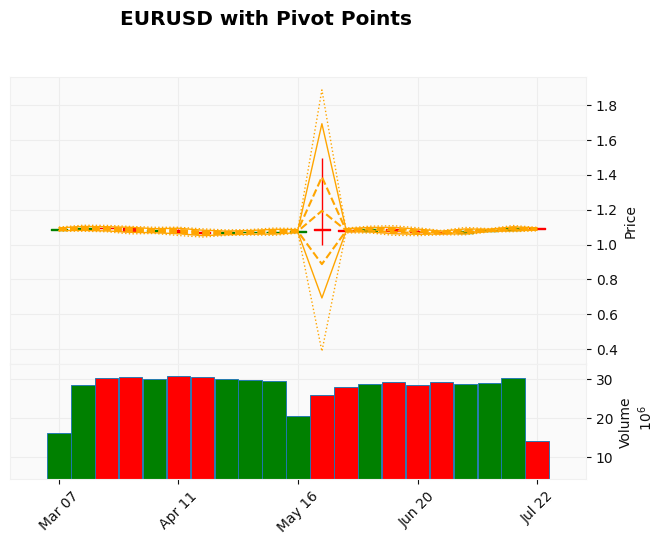

In [90]:
ap0 = [
    mpf.make_addplot(df['P'], color='orange', linestyle='--', width=1.5),
    mpf.make_addplot(df['R1'], color='orange', linestyle='--', width=1.5),
    mpf.make_addplot(df['S1'], color='orange', linestyle='--', width=1.5),
    mpf.make_addplot(df['R2'], color='orange', linestyle='-', width=1.0),
    mpf.make_addplot(df['S2'], color='orange', linestyle='-', width=1.0),
    mpf.make_addplot(df['R3'], color='orange', linestyle=':', width=1.0),
    mpf.make_addplot(df['S3'], color='orange', linestyle=':', width=1.0)
]

# Create custom style
my_style = mpf.make_mpf_style(
    base_mpf_style='yahoo',
    marketcolors=mpf.make_marketcolors(
        up='green',
        down='red',
        edge='i',
        wick='i',
        volume='in',
        ohlc='i'
    ),
    mavcolors=['#ef5714'],  # Example moving average color
    gridcolor='#EDEDED',
    gridstyle='-',
    y_on_right=True
)

# Plot the candlestick chart
mpf.plot(
    df,
    type='candle',
    addplot=ap0,
    volume=True,
    style=my_style,
    title='EURUSD with Pivot Points',
    ylabel='Price',
    ylabel_lower='Volume'
)